# K-means clustering 
#### Objective
Identify underlying subgroups of adolescents using K-means clustering analysis. 

#### Method
The clustering was made by specifying 11 clustering variables from the tree_addhealth.csv dataset which might be correlated to school achievement. The data was preprocessed through MinMax-scaling and setting the datatype to 64-bit float to ensure only numerical entries. The data was then split in train and test data with a ratio of 70-to-30 randomly. The number of clusters was then iterated in the range 1 - 10 since one of K-means limitation are that the user needs to know/have insight in the number of clusters. 

#### Results 
Through the "elbow"-method, one can see that roughly 3 clusters is suitable for this problem 

## Implementation
#### Import third-party modules 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

c:\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Load data

In [2]:
data = pd.read_csv('../../datasets/tree_addhealth.csv')

#### Create preprocess function for future use 

In [3]:
def process_addhealth_data(data): 
    """
    Processes the AddHealth dataset to have a mean = 0 and std = 1 and as type float64
    """
    data_norm = data.copy()
    
    from sklearn import preprocessing
    
    for feature in data: 
        data_norm[feature] = preprocessing.scale(data_norm[feature].astype('float64'))

    return data_norm

In [4]:
# Upper-case all column-names
data.columns = map(str.upper, data.columns)

# Remove NaN's
data = data.dropna()

cluster = data[['ALCEVR1','MAREVER1','ALCPROBS1','DEVIANT1','VIOL1',
'DEP1','ESTEEM1','SCHCONN1','PARACTV', 'PARPRES','FAMCONCT']]

# Print columns
print(cluster.columns)

Index(['ALCEVR1', 'MAREVER1', 'ALCPROBS1', 'DEVIANT1', 'VIOL1', 'DEP1',
       'ESTEEM1', 'SCHCONN1', 'PARACTV', 'PARPRES', 'FAMCONCT'],
      dtype='object')


In [5]:
cluster_norm = process_addhealth_data(cluster)

# Check output 
print(cluster_norm.head(5))

    ALCEVR1  MAREVER1  ALCPROBS1  DEVIANT1     VIOL1      DEP1   ESTEEM1  \
1  0.946562 -0.564982   0.704945  0.668994 -0.238562  1.288055 -1.106169   
3 -1.056455  1.769969  -0.412562  0.384917  0.918423  1.592454  1.123961   
5 -1.056455 -0.564982  -0.412562 -0.751392  0.532761 -0.081738  0.008896   
6 -1.056455 -0.564982  -0.412562  1.237149  1.304084 -0.690536  0.194740   
7  0.946562  1.769969  -0.412562  0.953071  2.461069 -0.690536 -0.176948   

   SCHCONN1   PARACTV   PARPRES  FAMCONCT  
1 -1.233684  0.806372  0.768105  0.279002  
3 -1.815551 -0.086525  0.288629 -1.480438  
5 -0.263907 -0.979421 -0.190847  0.431997  
6 -2.009506 -0.086525 -0.190847  0.814484  
7 -1.621595  1.104004  0.288629 -0.103485  


In [6]:
X_train, X_test = train_test_split(cluster_norm, test_size=.3, random_state=12)

In [7]:
clusters = range(1,10)
meandist = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(X_train)
    clusassign = model.predict(X_train)
    meandist.append(sum(np.min(cdist(X_train, model.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0])

Text(0.5,1,'Selecting the number of clusters with the Elbow Method')

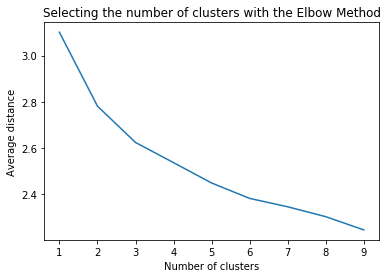

In [9]:
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting the number of clusters with the Elbow Method')